# Network Analysis  

## Outline
- **Median migration** 
- **Centralities**
- **Clustering**
- **Dynamics** 

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import random
import pickle

## Median Migration

In [26]:
df = pd.read_pickle('in_migv2_loops')
nodes = pd.read_pickle('raw_final_node_features_no_geo.pkl')
# migration_col = 'migration' + str(0)
in_df = pd.DataFrame(columns=['ifips', 'jfips'])

for year in df.keys():
    migration_col = 'migration' + year

    # Non-migrants processing
    self_loops = nodes[year][['Non_migrants', 'FIPS', 'FIPS']]
    self_loops.columns = [migration_col, 'ifips', 'jfips']
    self_loops.fillna(0, inplace=True)
    # print(self_loops[self_loops[migration_col] == 0].shape)
    # print(self_loops[self_loops['ifips'] == '06037'])
    # print(self_loops.tail())

    # Migrants processing
    df[year].columns = [migration_col, 'ifips', 'jfips']
    edges = pd.DataFrame(df[year], columns= [migration_col, 'ifips', 'jfips'])
    temp_df = pd.concat([edges, self_loops], ignore_index=True)
    in_df = pd.merge(in_df, temp_df,  how='outer', left_on=['ifips','jfips'], right_on = ['ifips','jfips'])
    # in_df.fillna(0, inplace=True)
    print(in_df[in_df[migration_col] == 0].shape)
    # print((df[year][df[year]['ifips'] == df[year]['jfips']]).sum())
    # print(in_df)

in_df['median_mig'] = in_df[['migration1996', 'migration1990', 'migration1998', 'migration1993',
       'migration1995', 'migration1999', 'migration1994', 'migration1997',
       'migration1992', 'migration1991', 'migration2008', 'migration2005',
       'migration2003', 'migration2009', 'migration2001', 'migration2006',
       'migration2000', 'migration2004', 'migration2002', 'migration2007',
       'migration2010', 'migration2011']].median(axis=1)

in_df['zeros'] = in_df[['migration1996', 'migration1990', 'migration1998', 'migration1993',
       'migration1995', 'migration1999', 'migration1994', 'migration1997',
       'migration1992', 'migration1991', 'migration2008', 'migration2005',
       'migration2003', 'migration2009', 'migration2001', 'migration2006',
       'migration2000', 'migration2004', 'migration2002', 'migration2007',
       'migration2010', 'migration2011']].eq(0).sum(axis=1)


median_df = in_df[['ifips', 'jfips', 'median_mig']].drop_duplicates()

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

(14, 3)
(8, 4)
(12, 5)
(11, 6)
(19, 7)
(16, 8)
(16, 9)
(16, 10)
(24, 11)


/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

(10, 12)
(91, 13)
(27, 14)
(28, 15)


/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

(88, 16)
(27, 17)
(25, 18)


/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

(27, 19)
(24, 20)
(26, 21)


/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

(56, 22)
(86, 23)
(85, 24)


/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_17510/556382386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_loops.fillna(0, inplace=True)


In [3]:
in_df[in_df['ifips'] == in_df['jfips']]['zeros']

78257     0
78258     0
78259     0
78260     0
78261     0
         ..
117055    0
117056    0
117058    0
180403    0
180902    0
Name: zeros, Length: 25385, dtype: int64

In [4]:
median_df[median_df['ifips'] == median_df['jfips']].sort_values(by='median_mig', ascending=False)

,ifips,jfips,median_mig
79731,06037,06037,3005795.5
79934,17031,17031,1858941.5
105258,17031,17031,1837052.0
79949,48201,48201,1079317.5
180902,12086,12086,1001139.0
...,...,...,...
109322,31007,31007,0.0
100802,48261,48261,0.0
100195,02231,02231,0.0
109321,31005,31005,-0.5


#### STATE level migrations  

In [5]:
# Rename the columns to match your actual column names if necessary
source_county_col = 'ifips'
target_county_col = 'jfips'
migration_col = 'median_mig'

# Define a function to extract the state FIPS code from a county FIPS code
def county_to_state_fips(county_fips):
    return int(str(county_fips).zfill(5)[:2])

# Create a new DataFrame with the state FIPS codes for each county FIPS code
median_df['source state'] = median_df[source_county_col].apply(county_to_state_fips)
median_df['target state'] = median_df[target_county_col].apply(county_to_state_fips)

# Group by source and target state FIPS codes and sum the migration values
state_migration = median_df.groupby(['source state', 'target state'])[migration_col].sum().reset_index()

# Rename the columns in the new DataFrame
state_migration.columns = ['source state', 'target state', 'migration']

# Mapping to names
state_fips_to_code = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC', 12: 'FL', 13: 'GA',
    15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD',
    25: 'MA', 26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ',
    35: 'NM', 36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC',
    46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'
}
# Convert the state FIPS codes to state codes
state_migration['source state'] = state_migration['source state'].map(state_fips_to_code)
state_migration['target state'] = state_migration['target state'].map(state_fips_to_code)

# remove all the ones that have 0 migration
state_migration = state_migration[state_migration['migration'] != 0]

In [6]:
# Print the unique values of migration by ascending order
state_migration['migration'].unique()

array([1.490869e+06, 1.300000e+02, 2.910000e+02, ..., 2.765000e+02,
       6.330000e+02, 3.311600e+05])

In [7]:
state_migration[state_migration['source state'] == state_migration['target state']].sort_values(by='migration', ascending=False)

,source state,target state,migration
1567,NY,NY,12750226.5
2081,TX,TX,12348932.5
438,FL,FL,11383241.5
188,CA,CA,11335650.0
1853,PA,PA,8915974.0
638,IL,IL,8521585.0
1707,OH,OH,8309841.0
1080,MI,MI,6681526.0
1465,NJ,NJ,5949068.0
1618,NC,NC,5165740.0


In [8]:
# Create an empty directed graph
G_state = nx.DiGraph()

# Iterate through the rows in the DataFrame and add edges to the graph
for index, row in state_migration.iterrows():
    source = row['source state']
    target = row['target state']
    weight = row['migration']
    G_state.add_edge(source, target, weight=weight)

# Print the graph's nodes and edges
print("Nodes:", G_state.nodes())
print("Edges:", G_state.edges(data=True))

Nodes: ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'OH', 'OK', 'OR', 'PA', 'SC', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'ID', 'ME', 'MT', 'NH', 'ND', 'SD', 'WY', 'RI', 'VT', 'WV']
Edges: [('AL', 'AL', {'weight': 1490869.0}), ('AL', 'AK', {'weight': 130.0}), ('AL', 'AZ', {'weight': 291.0}), ('AL', 'AR', {'weight': 99.0}), ('AL', 'CA', {'weight': 1120.5}), ('AL', 'CO', {'weight': 389.0}), ('AL', 'CT', {'weight': 62.5}), ('AL', 'DE', {'weight': 34.5}), ('AL', 'DC', {'weight': 71.0}), ('AL', 'FL', {'weight': 4848.0}), ('AL', 'GA', {'weight': 6609.5}), ('AL', 'HI', {'weight': 211.5}), ('AL', 'IL', {'weight': 401.5}), ('AL', 'IN', {'weight': 151.0}), ('AL', 'IA', {'weight': 11.0}), ('AL', 'KS', {'weight': 248.5}), ('AL', 'KY', {'weight': 368.0}), ('AL', 'LA', {'weight': 892.5}), ('AL', 'MD', {'weight': 275.0}), ('AL', 'MA', {'weight': 135.0}), ('AL', 'MI', {'w

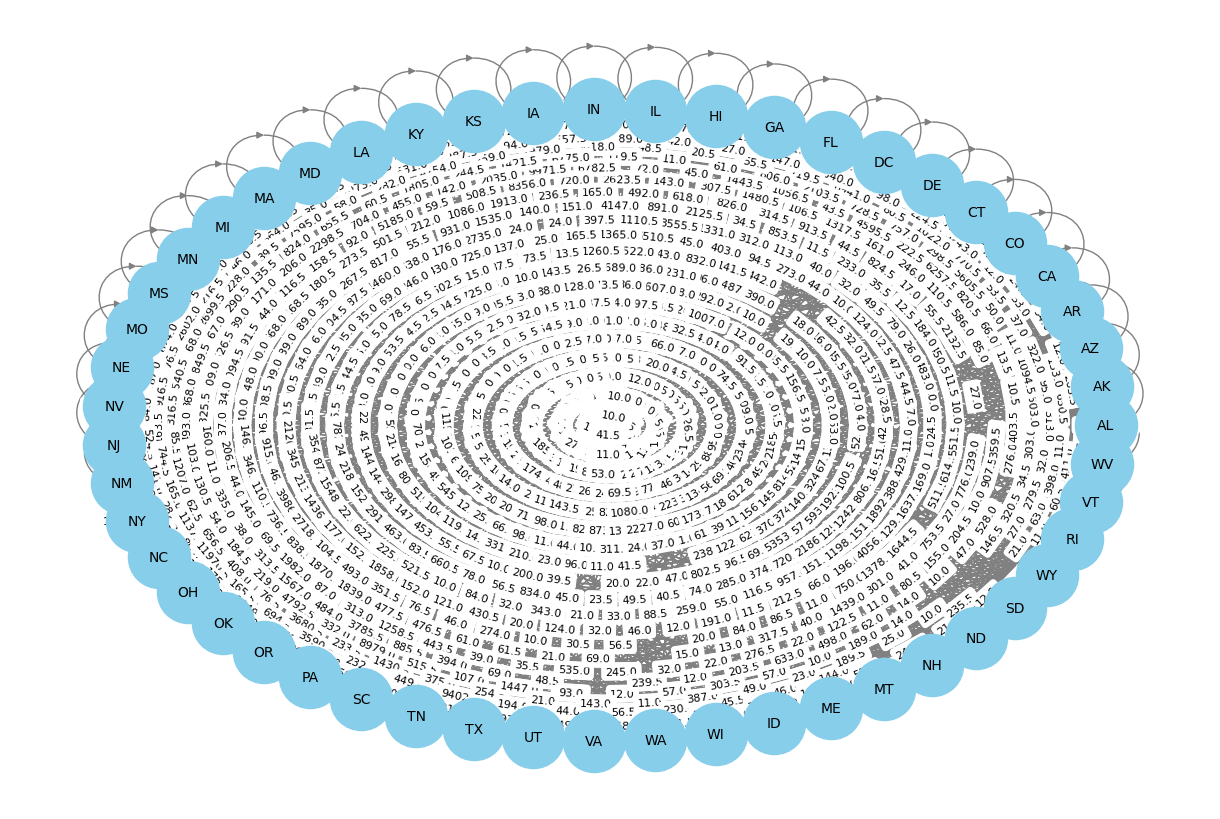

In [9]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Choose a layout algorithm
pos = nx.circular_layout(G_state)

# Draw the graph
nx.draw(G_state, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', arrows=True, font_size=10)
nx.draw_networkx_edge_labels(G_state, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G_state.edges(data=True)}, font_size=8)

# Display the plot
plt.show()


In [10]:
rawdf = pd.read_pickle('raw_final_node_features_no_geo.pkl')

## State level disasters

In [29]:
nodes = pd.read_pickle('raw_final_node_features_no_geo.pkl')

In [30]:
for year in nodes.keys():
    nodes[f'migration{year}'] = 0

In [31]:
nodes

{'1990':        FIPS  Non_migrants  Total Mig  CNTY_NAME STATE_NAME  disasters  \
 0     01021        9350.0      543.0    Chilton         AL        2.0   
 1     01047       15024.0      707.0     Dallas         AL        2.0   
 2     01051       15079.0     1479.0     Elmore         AL        1.0   
 3     01073      228715.0    10867.0  Jefferson         AL        1.0   
 4     01081       24466.0     2638.0        Lee         AL        NaN   
 ...     ...           ...        ...        ...        ...        ...   
 3120  30051         881.0       43.0    Liberty         MT        NaN   
 3121  31075         292.0       34.0      Grant         NE        NaN   
 3122  31091         344.0       22.0     Hooker         NE        NaN   
 3123  31171         326.0       33.0     Thomas         NE        NaN   
 3124  31103          -1.0        0.0  Keya Paha         NE        NaN   
 
       ihProgramDeclared  iaProgramDeclared  paProgramDeclared  disasters  \
 0                   0.0 